# <center>Mathematical Statistics: HW \# 3</center>
## <center>Due October 26th, 2021</center>
## <center>Solutions by Terrence Alsup</center>

Start by importing necessary packages that will be used throughout.

In [1]:
import numpy as np                         # Numerical computing
from matplotlib import pyplot as plt       # Plotting
from scipy import stats                    # Random Sampling
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 22})                      # Use Latex for formating plots and increase font size
from tqdm import tqdm                      # Keep track of progress for long loops

# Chapter 7

## Problem 3

Create a method called `ConfidenceBand()` to evaluate the functions

$$
    L(x) = \max\{ \hat{F}_n(x) - \epsilon_n,\ 0\},\quad U(x) = \min\{\hat{F}_n(x)+\epsilon_n,\ 1\} 
$$

with

$$
\epsilon_n = \sqrt{\frac{1}{2n}\log\frac{2}{\alpha}}
$$

In [2]:
def ConfidenceBand(X, x, alpha=0.05):
    """
    Compute a 1-alpha confidence band using the data X (default is 95% confidence band)
    by evaluating the upper and lower bounds at the grid points x.
    
    Input:
    X is a numpy array of shape (n,), where n is the sample size.
    alpha is a float between 0 and 1 (exclusive).
    x is a numpy array of shape (m,), where m is the number of grid points.
    
    Return:
    cb: a numpy array of shape (3,m), where cb[0] is the empirical cdf evaluated at
    the m grid points, cb[1] is the lower bound evaluated at the m grid points and 
    cb[2] is the upper bound evaluated at the grid points.
    """
    
    n = X.shape[0] # Get the sample size
    m = x.shape[0] # Get the number of grid points
    
    # Pre-allocate space for the results
    cb = np.zeros((3, m))
    
    # Compute the empirical cdf at the grid points x
    cb[0] = np.apply_along_axis(lambda x, X: np.mean(X <= x), 0, x.reshape((1,-1)), X)
    
    # Compute the lower bound
    cb[1] = np.maximum(cb[0] - np.sqrt(np.log(2/alpha)/(2*n)), 0)
    
    # Compute the upper bound
    cb[2] = np.minimum(cb[0] + np.sqrt(np.log(2/alpha)/(2*n)), 1)
    
    return cb

Now generate $n=100$ random observations from a $N(0,1)$ distribution and compute the confidence band using a grid of points.  Here the grid of points corresponds to $m=1000$ equally-spaced points between then $10^{-3}$ and $1 - 10^{-3}$ percentiles of the standard normal distribution.  You could also have used other grid points.

In [4]:
n = 100                 # Sample size
X = np.random.randn(n)  # Random observations
m = 1000                # Number of grid points
x = np.linspace(stats.norm.ppf(1e-3), stats.norm.ppf(1-1e-3), m)  # Grid points
cb = ConfidenceBand(X, x)   # Note that alpha = 0.05 by default

# Plot the results and include a legend and axis labels
plt.plot(x, cb.T)
plt.legend(['ECDF', 'Lower', 'Upper'])
plt.title('Confidence Bands for the Empirical CDF (ECDF)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability');

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/Users/yge/.matplotlib/tex.cache/42ec8fd854669fbb43e432cafba1aaa2.tex
LaTeX2e <2020-10-01> patch level 4
L3 programming layer <2021-02-18>
(/usr/local/texlive/2021basic/texmf-dist/tex/latex/base/article.cls
Document Class: article 2020/04/10 v1.4m Standard LaTeX document class
(/usr/local/texlive/2021basic/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.5 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on 42ec8fd854669fbb43e432cafba1aaa2.log.




<Figure size 432x288 with 1 Axes>

Create a method called `estimateCoverage()` that estimates the coverage using many trials to avoid repeating code for the Cauchy distribution later.

In [4]:
def estimateCoverage(trials, rv, n, m):
    """
    Estimate the coverage probability of the confidence band using repeated trials.
    rv is a random variable object 
    """
    
    # Get the grid points for the distribution
    x = np.linspace(rv.ppf(1e-3), rv.ppf(1-1e-3), 1000)

    count = 0  # Keep track whenever the confidence band does not contain the CDF
    for t in tqdm(range(trials)):
        X   = rv.rvs(size=n)          # Generate n=100 new observations
        cb  = ConfidenceBand(X, x)    # Compute the new confidence band
        cdf = rv.cdf(x)               # Evaluate the true CDF
        if np.any(cb[1] > cdf) or np.any(cb[2] < cdf):
            count += 1
            
    # Return coverage estimate
    return (trials - count)/trials

Now repeat this 1000 times and look at the percentage of times that the confidence band contains the true CDF of a standard normal distribution.

In [5]:
trials = 1000  # Total number of trials

rv = stats.norm

# Compute the estimated coverage
coverage = estimateCoverage(trials, rv, n, m)
print("Estimated Coverage = {:0.1f}%".format(100*coverage))

100%|██████████| 1000/1000 [00:16<00:00, 60.27it/s]

Estimated Coverage = 95.2%


Repeat using the Cauchy distribution.

In [6]:
rv = stats.cauchy

# Compute the estimated coverage
coverage = estimateCoverage(trials, rv, n, m)
print("Estimated Coverage = {:0.1f}%".format(100*coverage))

100%|██████████| 1000/1000 [00:18<00:00, 54.23it/s]

Estimated Coverage = 99.5%


You can easily test this for other distributions by changing what the random variable `rv` is.  A full list of options is available in the SciPy stats documentation https://docs.scipy.org/doc/scipy/reference/stats.html

## Problem 9

We can model the recovery of a patient as a Bernoulli random variable with parameter $p_1$ and $1$ corresponding to recovery.  The estimates for $p_1$ and $p_2$ are 
$$
    \hat{p}_1 = \frac{90}{100} = 0.9, \quad \hat{p}_2 = \frac{85}{100} = 0.85\, ,
$$
respectively.  An estimate for $\theta$ is $\hat{\theta} = \hat{p}_1 - \hat{p}_2 = 0.05$.  Because these estimates are sample means of Bernoulli random variables, the estimated standard error is given by
$$
    \widehat{\mathrm{se}}\left(\hat{\theta}\right) = \sqrt{ \frac{\hat{p}_1(1-\hat{p}_1)}{100} + \frac{\hat{p}_2(1-\hat{p}_2)}{100} } \approx 0.047\, .
$$
An approximate normal-based 80% confidence interval for $\theta$ is
$$
    \hat{\theta} \pm \Phi^{-1}(0.1) \widehat{\mathrm{se}}\left(\hat{\theta}\right) = 0.05 \pm 0.06\, ,
$$
where $\Phi^{-1}$ is the inverse CDF of a standard normal distribution.  An approximate 95\% confidence interval is given by
$$
    \hat{\theta} \pm \Phi^{-1}(0.025) \widehat{\mathrm{se}}\left(\hat{\theta}\right) = 0.05 \pm 0.09\, .
$$
Because even the 80% confidence interval contains 0, there is strong evidence that the new treatment is not statistically significant.

# Chapter 8

## Problem 2

First create a function called `bootstrapConfidenceIntervals()` that computes the bootstrap confidence intervals using each of the three methods.

In [7]:
def bootstrapConfidenceIntervals(T, X, B, alpha=0.05):
    """
    """
    
    # Pre-allocate space for the bootstrap confidence intervals
    bci = np.zeros((3, 2))
    
    # Evaluate the statistic for the sample
    Tx = T(X)
    
    n = X.shape[0]  # sample size
    
    # Create a vector to store all of the bootstrap replicates
    Tboot = np.zeros(B)
    
    # Perform bootstrap simulations
    for b in range(B):
        Xb = np.random.choice(X, n)  # Resample data
        Tboot[b] = T(Xb)             # Recompute statistic
    
    # Compute the normal-based bootstrap confidence interval
    z  = stats.norm.ppf(alpha/2)  # z-score (note that this is negative)
    se = np.std(Tboot)     # Standard error
    bci[0, 0] = Tx + z*se  # Lower bound
    bci[0, 1] = Tx - z*se  # Upper bound
    
    # Compute the pivot bootstrap confidence interval
    Tboot_low = np.quantile(Tboot, alpha/2)
    Tboot_upp = np.quantile(Tboot, 1-alpha/2)
    bci[1, 0] = 2*Tx - Tboot_upp   # Lower bound
    bci[1, 1] = 2*Tx - Tboot_low   # Upper bound
    
    # Compute the quantile bootstrap confidence interval
    bci[2, 0] = Tboot_low  # Lower bound
    bci[2, 1] = Tboot_upp  # Upper bound
    
    return bci

Compute the bootstrap confidence intervals using the simulated data.

In [8]:
B = 10000  # Bootstrap replicates
n = 50     # Sample size
Y = np.exp(np.random.randn(n))  # Random samples

bci = bootstrapConfidenceIntervals(stats.skew, Y, B)

# Print results
print('Method       Lower Bound       Upper Bound')
print('------------------------------------------')
print('Normal          {:0.2f}              {:0.2f}'.format(bci[0, 0], bci[0, 1]))
print('Pivot           {:0.2f}              {:0.2f}'.format(bci[1, 0], bci[1, 1]))
print('Quantile        {:0.2f}              {:0.2f}'.format(bci[2, 0], bci[2, 1]))

Method       Lower Bound       Upper Bound
------------------------------------------
Normal          0.65              1.79
Pivot           0.61              1.76
Quantile        0.68              1.83


In [9]:
# Estimate the true skewness using many samples
skewness = stats.skew(np.exp(np.random.randn(int(1e8))))
print("Estimated skewness = {:0.3f}".format(skewness))

B = 10000
trials = 100
counts = np.zeros(3)  # For each method keep track of if the confidence interval contains the true value
for t in tqdm(range(trials)):
    Y = np.exp(np.random.randn(n)) # Generate new observations
    bci = bootstrapConfidenceIntervals(stats.skew, Y, B)
    if (bci[0, 0] <= skewness) and (skewness <= bci[0, 1]):
        counts[0] += 1
    if (bci[1, 0] <= skewness) and (skewness <= bci[1, 1]):
        counts[1] += 1
    if (bci[2, 0] <= skewness) and (skewness <= bci[2, 1]):
        counts[2] += 1

# Compute coverage estimates
coverages = counts/trials

# Print results
print("Method           Estimated Coverage %")
print("-------------------------------------")
print("Normal                 {:0.1f}".format(coverages[0]*100))
print("Pivot                  {:0.1f}".format(coverages[1]*100))
print("Quantile               {:0.1f}".format(coverages[2]*100))

Estimated skewness = 6.210


100%|██████████| 100/100 [05:02<00:00,  3.03s/it]

Method           Estimated Coverage %
-------------------------------------
Normal                 9.0
Pivot                  12.0
Quantile               2.0


As we can see, these coverage estimates are extremely low and well below 95%.  The issue is that the skewness of a log-normal distribution is very difficult to estimate.  The log-normal distribution has heavy tails which means that an extreme event will occur rarely.  With only $n=50$ samples, most of the samples will be far below the mean giving inaccurate estimates.  Moreover, the bootstrap distribution will not be close to the true sampling distribution.  Let's investigate this a little more by looking at these two distributions and compare them to the true skewness value.

In [10]:
B = 10000  # Number of bootstrap replicates
tboot = np.zeros(B)  # Bootstrap replicates
tsamp = np.zeros(B)  # Independent estimates of the skewness

Y = np.exp(np.random.randn(50))
for i in tqdm(range(B)):
    Yb = np.random.choice(Y, 50)
    tboot[i] = stats.skew(Yb)
    tsamp[i] = stats.skew(np.exp(np.random.randn(50)))

100%|██████████| 10000/10000 [00:06<00:00, 1663.56it/s]


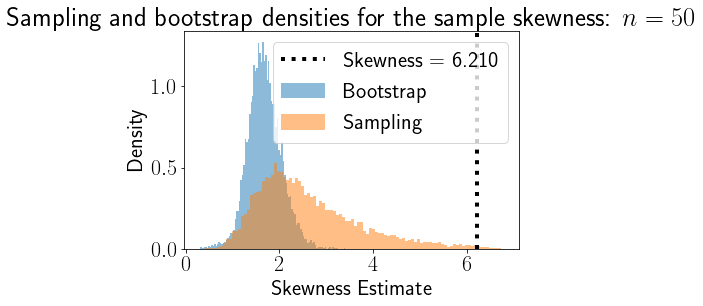

In [12]:
plt.hist(tboot, alpha=0.5, bins=100, density=True, label='Bootstrap')
plt.hist(tsamp, alpha=0.5, bins=100, density=True, label='Sampling')
plt.axvline(skewness, ls=':', c='k', lw=4, label='Skewness = {:0.3f}'.format(skewness))
plt.xlabel('Skewness Estimate')
plt.ylabel('Density')
plt.title('Sampling and bootstrap densities for the sample skewness: $n=50$')
plt.legend();

We see that the sampling distribution for the estimator when $n=50$ is generally very far from the true skewness, which was estimated with $10^8$ samples.  Furthermore, the bootstrap does not provide a good approximation to the sampling distribution.  These two reasons are why the coverage probabilities, and hence also their estimates, are extremely low.  The confidence intervals almost never contain the true skewness.

## Problem 6

### (a)

Since $X_1,\ldots,X_n \sim N(5, 1)$ are i.i.d., we know that $\bar{X}_n \sim N(5, 1/n)$.  Therefore, $\hat{\theta}$ has a log-normal distribution, which is the true sampling distribution.  We know that in this case the true standard error is given by the formula (see Wikipedia https://en.wikipedia.org/wiki/Log-normal_distribution)

$$
\mathrm{se}(\hat{\theta}) = \sqrt{ (e^{n^{-1}} - 1)(e^{2\mu} + n^{-1})  }
$$

In [13]:
# Create a data set
n = 100  # Sample size
mu = 5
X = mu + np.random.randn(n)

# Estimate theta
theta_hat = np.exp(np.mean(X))

# Use the bootstrap to get the standard error
B = int(1e4)
tboot = np.zeros(B)
for b in tqdm(range(B)):
    Xb = np.random.choice(X, n)    # Resampled data
    tboot[b] = np.exp(np.mean(Xb)) # Bootstrap replicate
se = np.std(tboot)
# Compute confidence interval lower and upper bounds
lower = theta_hat - 2*se
upper = theta_hat + 2*se

# True standard error from log-normal formula
true_se = np.sqrt((np.exp(1/n)-1)*(np.exp(2*mu) + 1/n))

# Print the estimate, standard error, and 95% confidence interval
print('Theta_hat      = {:0.3f}'.format(theta_hat))
print('True Std. Err. = {:0.3f}'.format(true_se))
print('Est. Std. Err. = {:0.3f}'.format(se))
print('95% C.I.       = [{:0.2f}, {:0.2f}]'.format(lower, upper))

100%|██████████| 10000/10000 [00:00<00:00, 19828.48it/s]

Theta_hat      = 145.642
True Std. Err. = 14.878
Est. Std. Err. = 13.488
95% C.I.       = [118.67, 172.62]


### (b)

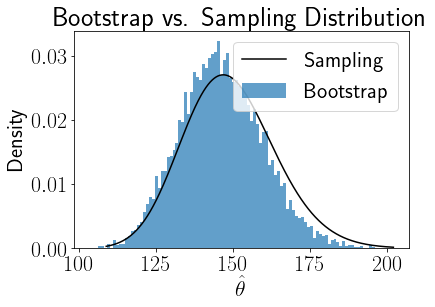

In [14]:
# Plot the normalized histogram against the true sampling density
rv = stats.lognorm(scale=np.exp(5), s=1/np.sqrt(n), loc=0)
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 1000)


# Plot results
plt.hist(tboot, bins=100, density=True, alpha=0.7, label='Bootstrap')
plt.plot(x, rv.pdf(x), c='k', label='Sampling')
plt.xlabel('$\hat{\\theta}$')
plt.ylabel('Density')
plt.title('Bootstrap vs. Sampling Distribution')
plt.legend();

In comparing the true sampling distribution with the bootstrap approximation, we see that although they are rarely centered at the same location, both distributions have approximately the same width.  This means that bootstrap standard error estimates will be good approximations of the true standard error.  In fact we see this is the case by using the formula for the true standard error.

## Problem 7

### (a)

We can easily find the distribution of the maximum by first finding the CDF.
$$
F_{\hat{\theta}}(x) = P(\max \{X_1,\ldots,X_n\} \le x) = \prod_{i=1}^n P(X_i \le x) = \left(\frac{x}{\theta}\right)^n, \quad x\in [0,\theta] 
$$
and then taking the derivative to get the density
$$
f_{\hat{\theta}}(x) = \frac{nx^{n-1}}{\theta^n},\quad x\in[0,\theta]
$$

100%|██████████| 10000/10000 [00:00<00:00, 24517.80it/s]


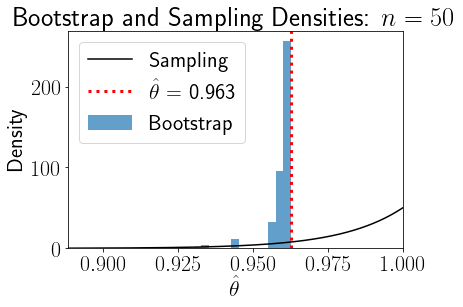

In [15]:
# Draw uniform random data with theta=1 and n=50
n = 50
X = np.random.rand(n)

# Compute theta_hat
theta_hat = np.max(X)

# Compute bootstrap replicates
B = int(1e4)
tboot = np.zeros(B)
for b in tqdm(range(B)):
    Xb = np.random.choice(X, n)  # Bootstrap resampled data
    tboot[b] = np.max(Xb)        # Bootstrap replicate

# Plot bootstrap replicate results and compare with the true density
plt.hist(tboot, density=True, bins=30, alpha=0.7, label='Bootstrap')
x = np.linspace(np.min(tboot), 1, 1000) # Equally-spaced points between 0 and theta=1
fx = n*x**(n-1)  # Density of estimator with theta=1
plt.plot(x, fx, c='k', label='Sampling')
theta_str = '$\hat\\theta$ = {:0.3f}'.format(theta_hat)
plt.axvline(theta_hat, c='r', ls=':', lw=3, label=theta_str)
plt.xlabel('$\hat{\\theta}$')
plt.xlim([np.min(tboot), 1])
plt.ylabel('Density')
plt.title('Bootstrap and Sampling Densities: $n=50$')
plt.legend();

The true sampling distribution is continuous up to the true value of $\theta$ whereas the bootstrap distribution is discrete and can never exceed the value of $\hat{\theta}$.  In fact the support of the bootstrap distribution is exactly the original data points $X_1,\ldots,X_n$.

### (b)

Since $\hat{\theta}$ has a continuous distribution we know that

$$
P\left(\hat{\theta}(X_1,\ldots,X_n) = \hat{\theta}(x_1,\ldots,x_n)\right) = 0,
$$

where $x_1,\ldots,x_n$ are realizations of the random variables $X_1,\ldots,X_n$ i.e. the data.  At the same time note that $\hat{\theta}^* = \hat{\theta}$ whenever the bootstrap sample contains the maximum.  In other words, at least one of the bootstrap resampled data is the maximum.  Therefore,

$$
P\left( \hat{\theta}^* = \hat{\theta} \right) = 1 - P\left( X_j^* \neq \hat{\theta},\ \forall j=1,\ldots,n \right)
$$

Since each resampled data point cannot be the maximum, there are $n-1$ options remaining and the probability of choosing one of these is $(n-1)/n = 1 - 1/n$.  Moreover, since the bootstrap resampled data is conditionally independent given the original data set, we have that

$$
P\left( \hat{\theta}^* = \hat{\theta} \right) = 1 - \left(1 - \frac{1}{n} \right)^n
$$

which converges to $1 - e^{-1} \approx 0.632$ in the limit as $n\to \infty$.

# Chapter 9

## Problem 1

If $X_1,\ldots,X_n \sim \text{Gamma}(\alpha, \beta)$, then the method of moments estimator can be found by computing the first two moments.

$$
\mathbb{E}[X] = \alpha \beta,\quad \mathrm{Var}[X] = \alpha \beta^2,
$$

and setting the estimators $\hat{\alpha},\hat{\beta}$ to solve the equations

$$
\bar{X}_n = \hat{\alpha}\hat{\beta},\quad \hat{\sigma}_n^2 = \hat{\alpha}\hat{\beta}^2,
$$

where

$$
\hat{\sigma}_n^2 = \frac{1}{n}\sum_{i=1}^n \left( X_i - \bar{X}_n \right)^2 .
$$

Note that for the method of moments, using either the variance or the second moment will give equivalent results because 

$$
\mathrm{Var}[X] + \mathbb{E}[X]^2 = \mathbb{E}[X^2],\quad \hat{\sigma}_n^2 + \bar{X}_n^2 = \frac{1}{n}\sum_{i=1}^n X_i^2 .
$$

Now we easily see by solving that

$$
\hat{\alpha} = \frac{\bar{X}_n^2}{\hat{\sigma}_n^2},\quad \hat{\beta} = \frac{\hat{\sigma}_n^2}{\bar{X}_n} .
$$

## Problem 2

### (a)

Let $X_1,\ldots,X_n \sim \text{Uniform}[a,b]$.  The mean and the variance are

$$
\mathbb{E}[X] = \frac{a+b}{2},\quad \mathrm{Var}[X] = \frac{(b-a)^2}{12}
$$

so the method of moment equations are

$$
\bar{X}_n = \frac{\hat{a} + \hat{b}}{2},\quad \hat{\sigma}_n^2 = \frac{(\hat{b} - \hat{a})^2}{12}
$$

First solve for $\hat{a}$ with

$$
\hat{a} = 2\bar{X}_n - b, 
$$

so that

$$
\hat{\sigma}^2_n = \frac{(2\hat{b} - 2\bar{X}_n)^2}{12} = \frac{(\hat{b} - \bar{X}_n)^2}{3},
$$

and therefore solving for $\hat{b}$ and plugging back in to get $\hat{a}$ gives

$$
\hat{a}= \bar{X}_n -\sqrt{3}\hat{\sigma}_n  ,\quad \hat{b} = \bar{X}_n + \sqrt{3} \hat{\sigma}_n.
$$

### (b)

The likelihood function for the data is

$$
L(a,b ; X_1,\ldots,X_n) = \prod_{i=1}^n \frac{1}{b-a} \mathbf{1}\{X_i \in [a,b]\} = \frac{1}{(b-a)^n} \mathbf{1}\{ a \le \min X_i,\ \max X_i \le b\} ,
$$

which is increasing in $a$ and decreasing in $b$ as long as $a < b$.  Moreover, we see that the largest value $a$ can take is $\min X_i$ while the smallest value that $b$ can take without the likelihood being 0 is $\max X_i$.  Therefore the maximum likelihood estimators are

$$
\hat{a}_{\mathrm{MLE}} = \min\{X_1,\ldots,X_n\}, \quad \hat{b}_{\mathrm{MLE}} = \max\{X_1,\ldots,X_n\}.
$$


### (c)

By the equivariance property of the maximum likelihood estimator we know that the maximum likelihood estimator of $\mathbb{E}[X] = (a+b)/2$ is 

$$
\hat{\tau} = \frac{\max\{X_1,\ldots,X_n\} + \min\{X_1,\ldots,X_n\}}{2} .
$$

### (d)

The plug-in estimator for the mean is

$$
\tilde{\tau} = \bar{X}_n ,
$$

which is unbiased.  Therefore, the MSE is the variance

$$
\mathrm{MSE}(\tilde{\tau}) = \mathrm{Var}[\tilde{\tau}] = \frac{\mathrm{Var}[X_1]}{n} = \frac{(b-a)^2}{12n} .
$$

In the case where $a=1,b=3$, and $n=10$, we can use this formula to compute the MSE exactly.

In [16]:
# Set the parameters
a = 1
b = 2
n = 10
tau = (a+b)/2  # True mean

# Estimate MSE of the MLE estimator through simulation
trials = 100000
tau_hat = np.zeros(trials)
for i in range(trials):
    X = a + (b-a)*np.random.rand(n)  # Generate n uniform[a,b] variables
    tau_hat[i] = 0.5*(np.min(X) + np.max(X))

# Estimate the MSE
MSE_mle = np.mean((tau_hat - tau)**2)

# Use the formula to compute the exact MSE for the nonparametric plug-in estimator
MSE_plg = (b-a)**2/(12*n)

# Print results
print('Method       Mean Squared Error')
print('-------------------------------')
print('Plug-in         {:0.2e}'.format(MSE_plg))
print('MLE             {:0.2e}'.format(MSE_mle))

Method       Mean Squared Error
-------------------------------
Plug-in         8.33e-03
MLE             3.81e-03


We see that the maximum likelihood estimate of the mean has lower MSE than the nonparametric plug-in estimator.  This is because for this particular problem, the maximum likelihood estimators converge extremely fast, at a rate of $O(1/n^2)$ in MSE, to their respective parameters.

## Problem 3

### (a)

Since $\tau$ is the 95% percentile we know that

$$
0.95 = P(X < \tau) = P\left(  Z  < \frac{\tau - \mu}{\sigma} \right) = \Phi\left( \frac{\tau - \mu}{\sigma} \right)
$$

where $Z \sim N(0,1)$ and $\Phi$ is the CDF of the standard normal distribution.  Thus,

$$
\tau = \mu +  \Phi^{-1}(0.95) \sigma .
$$

We will use the equivariance property of the maximum likelihood estimator to obtain

$$
\hat{\tau} = \hat{\mu} + \Phi^{-1}(0.95) \hat{\sigma},
$$

where

$$
\hat{\mu} = \frac{1}{n}\sum_{i=1}^n X_i,\quad \hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (X_i - \hat{\mu})^2 .
$$

To see that these are the maximum likelihood estimators start by writing down the likelihood function

$$
L(\mu, \sigma^2; X_1,\ldots,X_n) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{1}{2\sigma^2}(X_i - \mu)^2 \right) = \frac{1}{\sqrt{2\pi} \sigma^{n}} \exp\left( -\frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2 \right) .
$$

The log-likelihood becomes

$$
\log L(\mu, \sigma^2; X_1,\ldots,X_n) = -\frac{1}{2}\log(2\pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^n (X_i - \mu)^2 .
$$

The derivatives with respect to $\mu$ and $\sigma^2$ are 

$$
\frac{\partial}{\partial \mu}\log L(\mu, \sigma^2; X_1,\ldots,X_n) = \frac{1}{\sigma^2} \sum_{i=1}^n (X_i - \mu),
$$

and

$$
\frac{\partial}{\partial \sigma^2}\log L(\mu, \sigma^2; X_1,\ldots,X_n) = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum_{i=1}^n (X_i - \mu)^2 .
$$

From here we can set these derivatives to zero to find that $(\hat{\mu}, \hat{\sigma}^2)$ is a critical point of the log-likelihood.  To ensure that this point is the maximum likelihood estimator we also need to perform a second derivative test by looking at the matrix of second derivatives.  We have that

$$
\frac{\partial^2}{\partial \mu^2}\log L(\mu, \sigma^2; X_1,\ldots,X_n) = \frac{-n}{\sigma^2} ,
$$

$$
\frac{\partial^2}{\partial (\sigma^2)^2}\log L(\mu, \sigma^2; X_1,\ldots,X_n) = \frac{n}{2\sigma^4} - \frac{1}{\sigma^6}\sum_{i=1}^n (X_i - \mu)^2 ,
$$

and

$$
\frac{\partial^2}{\partial \mu \partial \sigma^2}\log L(\mu, \sigma^2; X_1,\ldots,X_n) = -\frac{1}{\sigma^4} \sum_{i=1}^n (X_i - \mu) .
$$

The Hessian matrix of second derivatives at the MLE is

$$
\nabla \nabla^\top \log L(\hat{\mu}, \hat{\sigma}^2; X_1,\ldots,X_n)
= \begin{bmatrix}
-n/\hat{\sigma}^2 & 0\\
0 & -n/(2\hat{\sigma}^4) 
\end{bmatrix},
$$

which is negative definite.  Therefore, $(\hat{\mu},\hat{\sigma})$ is indeed the maximum likelihood estimator.

### (b)

To find an approximate $1-\alpha$ confidence interval for $\tau$ we will start by finding the asymptotic distribution of the MLE $\hat{\tau}$ by using the fact that the MLE is asymptotically normal and then applying the multivariate delta method.  To start we derive the Fisher information matrix by reusing the second derivatives we computed in the previous part.

$$
I_n(\mu, \sigma^2) = \begin{bmatrix}
n/\sigma^2 & 0\\
0 & n/(2\sigma^4)
\end{bmatrix}
$$

where we have used the facts that

$$
\mathbb{E}\left[ \sum_{i=1}^n (X_i - \mu) \right] = 0,\quad \mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n (X_i - \mu)^2\right] = \sigma^2 .
$$

Now define the function 

$$
g(x,y) = x + \Phi^{-1}(0.95) \sqrt{y} ,
$$

which has the gradient

$$
\nabla g(x,y) = \begin{bmatrix}
1 \\
\Phi^{-1}(0.95)/(2\sqrt{y})
\end{bmatrix}
$$

Therefore, the multivariate delta method implies that the asymptotic distribution for $\hat{\tau}$ is

$$
\hat{\tau} \approx N\left( g(\mu, \sigma^2),\  \nabla g(\mu,\sigma^2)^\top I_n(\mu,\sigma^2)^{-1} \nabla g(\mu, \sigma^2) \right) .
$$

Since $g(\mu,\sigma^2) = \tau$ and $I_n$ is a diagonal matrix, which can easily be inverted, we have that

$$
\hat{\tau} \approx N\left( \tau,\ \frac{\sigma^2}{n}\left( 1 + \frac{1}{2}\Phi^{-1}(0.95)^2\right) \right) ,
$$

and therefore an approximate $1-\alpha$ confidence interval for $\tau$ is 

$$
\hat{\tau} \pm \Phi^{-1}\left(1-\frac{\alpha}{2}\right) \frac{\hat{\sigma}}{\sqrt{n}} \sqrt{ 1 + \frac{1}{2}\Phi^{-1}(0.95)^2} .
$$

### (c)

In [17]:
# Input the data
X = np.array([
    3.23, -2.5, 1.88, -0.68, 4.43, 0.17,
    1.03, -0.07, -0.01, 0.76, 1.76, 3.18,
    0.33, -0.31, 0.3, -0.61, 1.52, 5.43,
    1.54, 2.28, 0.42, 2.33, -1.03, 4., 0.39
])

In [18]:
# Get the sample size
n = X.shape[0]

# Compute the MLE
mu_hat = np.mean(X)
sigma_hat = np.std(X)
phi95 = stats.norm.ppf(0.95)
tau_hat = mu_hat + phi95*sigma_hat

# Compute the standard error using the delta method asymptotic expression 
se_delta = np.sqrt(1 + 0.5*phi95**2)*sigma_hat/np.sqrt(n)

# Compute the standard error using the parametric bootstrap
B = int(1e4)
tboot = np.zeros(B)
for i in range(B):
    Xb = mu_hat + sigma_hat*np.random.randn(n)
    tboot[i] = np.mean(Xb) + phi95*np.std(Xb)
se_boot = np.std(tboot)

# Print results
print('Tau MLE = {:0.3f}'.format(tau_hat))
print('--------------------------------------------')
print('Std. Err. Delta Method         = {:0.2e}'.format(se_delta))
print('Std. Err. Parametric Bootstrap = {:0.2e}'.format(se_boot))

Tau MLE = 4.180
--------------------------------------------
Std. Err. Delta Method         = 5.58e-01
Std. Err. Parametric Bootstrap = 5.58e-01


Since we obtain similar results for the standard errors for both methods, this leads us to believe that our expression for the standard error was derived correctly.

## Problem 5

Let $X_1,\ldots,X_n \sim \text{Poisson}(\lambda)$ be i.i.d.  The mean of the Poisson distribution is $\lambda$, and so the method of moments estimator is simply

$$
\hat{\lambda}_{\mathrm{MOM}} = \bar{X}_n  .
$$

For the maximum likelihood estimator, start by writing down the likelihood function

$$
L(\lambda; X_1,\ldots,X_n) = \prod_{i=1}^n \frac{\lambda^{X_i} e^{-\lambda}}{X_i!} = \frac{\lambda^{\sum_{i=1}^n X_i} e^{-\lambda n}}{\prod_{i=1}^n X_i !} .
$$

The log-likelihood is

$$
\log L(\lambda; X_1,\ldots, X_n) = \log(\lambda) \sum_{i=1}^n X_i - \lambda n - \log\left( \prod_{i=1}^n X_i! \right).
$$

The derivative of the log-likelihood is

$$
\frac{\partial}{\partial \lambda}\log L(\lambda; X_1,\ldots, X_n) = \frac{1}{\lambda} \sum_{i=1}^n X_i - n .
$$

Setting the derivative to zero and solving gives the maximum likelihood estimator

$$
\hat{\lambda}_{\mathrm{MLE}} = \bar{X}_n . 
$$

To see that this is indeed a maximizer of the log-likelihood we employ the second derivative test.

$$
\frac{\partial^2}{\partial \lambda^2} \log L(\lambda; X_1,\ldots, X_n) = -\frac{1}{\lambda^2} \sum_{i=1}^n X_i ,
$$

which is negative and therefore $\hat{\lambda}_{\mathrm{MLE}}$ is indeed the maximum likelihood estimate.  Finally, we can easily compute the Fisher information since we already have the second derivative.

$$
I_n(\lambda) = \mathbb{E}\left[-\frac{\partial^2}{\partial \lambda^2} \log L(\lambda; X_1,\ldots, X_n)\right] = \frac{1}{\lambda^2}\mathbb{E}\left[\sum_{i=1}^n X_i \right] = \frac{n}{\lambda} .
$$

# Additional Problems

## Problem 1

In [5]:
# Set the parameters
B = 1000      # number of bootstrap replicates
gamma = 0.1   # model parameter
Ne = 1000     # number of experiments

# Exact correlation
rho_exact = (2*gamma)/(1+gamma**2)

In [6]:
def sample_data(n, gamma, Ne):
    """
    Helper method to sample data X and Y.
    """
    W = np.random.randn(Ne, n)  # Rows correspond to different experiments
    Z = np.random.randn(Ne, n)
    X = W + gamma*Z
    Y = Z + gamma*W
    return (X, Y)

In [7]:
def compute_rho_hat(X, Y):
    """
    Compute rho_hat for each experiment.
    X, Y have shape (Ne, n)
    Returns a vector of shape (Ne,)
    """
    # Estimated correlation for each each experiment (vector of length Ne)
    rho_hat = np.mean(X*Y, axis=1) / np.sqrt( np.mean(X*X, axis=1) * np.mean(Y*Y, axis=1) )
    return rho_hat

In [8]:
def bias_corrected_rho(X, Y, B):
    """
    Estimate the bias-corrected correlation coefficient using B bootstrap replicates.
    
    Note that here X and Y have shape (n,) and the output is a float.
    """
    # Get sample size
    n = X.shape[0]
    # Compute the plug-in estimate
    rho_hat = np.mean(X*Y) / np.sqrt( np.mean(X*X) * np.mean(Y*Y) )
    
    # Pre-allocate space for bootstrap samples
    rho_boot = np.zeros(B)
    for b in range(B):
        # Get random indices to resample at, ensure that indices for X,Y are the same
        idx = np.random.choice(n, n)
        # Resample data
        Xb = X[idx]
        Yb = Y[idx] 
        # Compute bootstrap replicate
        rho_boot[b] = np.mean(Xb*Yb) / np.sqrt( np.mean(Xb*Xb) * np.mean(Yb*Yb) )
    
    # Return the bias-corrected rho
    return 2*rho_hat - np.mean(rho_boot)

In [9]:
def compute_rho_boot(X, Y, B):
    """
    Helper method to compute the bias corrected rho for many experiments.
    """
    Ne = X.shape[0]
    # Perform Ne experiments
    rho_boot = np.zeros(Ne)
    for i in range(Ne):
        rho_boot[i] = bias_corrected_rho(X[i], Y[i], B)
    return rho_boot

In [10]:
# Wrap everything into the following function.
def estimate_bias_RMSE(n, gamma, B, Ne, rho_exact):
    X, Y = sample_data(n, gamma, Ne)
    # Compute the plug-in and bias corrected bootstrap estimators
    rho_hat  = compute_rho_hat(X, Y)
    rho_boot = compute_rho_boot(X, Y, B)
    # Estimate the bias of each method
    bias = np.zeros(2)
    rmse = np.zeros(2)
    bias[0] = np.mean(rho_hat) - rho_exact
    bias[1] = np.mean(rho_boot) - rho_exact
    rmse[0] = np.sqrt(np.mean((rho_hat - rho_exact)**2))
    rmse[1] = np.sqrt(np.mean((rho_boot - rho_exact)**2))
    return (bias, rmse)

In [ ]:
# Compute the bias and rmse over many experiments for different sample sizes
nlist = [10, 15, 25, 50, 100, 250]

bias = np.zeros((len(nlist), 2))
rmse = np.zeros((len(nlist), 2))

for i in range(len(nlist)):
    n = nlist[i]
    bias[i], rmse[i] = estimate_bias_RMSE(i, gamma, B, Ne, rho_exact)
    print(n) # Print n to keep track of progress

/Users/yge/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yge/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/yge/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10
15
25
50
100


In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,4))
ax[0].semilogx(nlist, bias[:,0], c='b', marker='o', label='$\hat{\\rho}$')
ax[0].semilogx(nlist, bias[:,1], c='r', marker='s', label='$\hat{\\rho}_{\mathrm{boot}}$')
ax[0].legend()
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('Bias')
ax[0].grid()


ax[1].semilogx(nlist, rmse[:,0], c='b', marker='o', label='$\hat{\\rho}$')
ax[1].semilogx(nlist, rmse[:,1], c='r', marker='s', label='$\hat{\\rho}_{\mathrm{boot}}$')
ax[1].legend()
ax[1].set_xlabel('$n$')
ax[1].set_ylabel('RMSE')
ax[1].grid()

plt.tight_layout()

We see that as we increase the sample size $n$, the RMSE decreases towards 0.  Moreover, the plug-in estimator performs slightly better than the bias-corrected bootstrap estimator in terms of RMSE, although it indeed has a larger bias.